## House Price Prediction.🏠

<img src="Screenshot 2025-05-26 172730" width='900' height='375'>

# About Dataset

##### The real estate markets in cities like Sydney and Melbourne offer a valuable opportunity for data analysts to explore and predict property price trends. Accurate prediction of property prices is increasingly important, as these prices serve as strong indicators of market conditions and overall economic health. Given the dataset of property sales currently in an unknown format and with potential data quality issues we aim to clean, analyze, and prepare it for meaningful insights and predictive modeling.

### Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt 
import plotly.express as px
from sklearn.preprocessing import StandardScaler, MinMaxScaler,PowerTransformer,LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings('ignore')

In [68]:
from xgboost import XGBRegressor

In [1]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/150.0 MB ? eta -:--:--
   ---------------------------------------- 0.5/150.0 MB 5.6 MB/s eta 0:00:27
   ---------------------------------------- 1.0/150.0 MB 3.6 MB/s eta 0:00:42
    --------------------------------------- 2.4/150.0 MB 4.3 MB/s eta 0:00:35
    --------------------------------------- 3.4/150.0 MB 4.6 MB/s eta 0:00:33
   - -------------------------------------- 4.5/150.0 MB 4.7 MB/s eta 0:00:31
   - -------------------------------------- 5.8/150.0 MB 4.9 MB/s eta 0:00:30
   - -------------------------------------- 7.1/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 7.9/150.0 MB 4.9 MB/s eta 0:00:29
   -- ------------------------------------- 9.2/150.0 MB 5.1 MB/s eta 0:00:28
   -- ------------------------------------- 10.7/150.0 MB 5.3 MB/s eta 0:00:27
   --- ------------------------------------ 12.3/150.0 MB 5.5 MB/s eta

In [2]:
import warnings
warnings.filterwarnings('ignore')

### 🔃Load the Data

In [3]:
import numpy as np
import pandas as pd
df = pd.read_csv(r"C:\Users\Asus Pc\Desktop\python\data.csv")
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,street,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,18810 Densmore Ave N,Shoreline,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,709 W Blaine St,Seattle,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,26206-26214 143rd Ave SE,Kent,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,857 170th Pl NE,Bellevue,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,9105 170th Ave NE,Redmond,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,501 N 143rd St,Seattle,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,14855 SE 10th Pl,Bellevue,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,759 Ilwaco Pl NE,Renton,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,5148 S Creston St,Seattle,WA 98178,USA


#### Explore the Data (EDA)

In [4]:
df.shape

(4600, 18)

In [5]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
price,4600.0,551962.988473,563834.702547,0.0,322875.00,460943.461539,654962.50,26590000.0
bedrooms,4600.0,3.400870,0.908848,0.0,3.00,3.000000,4.00,9.0
bathrooms,4600.0,2.160815,0.783781,0.0,1.75,2.250000,2.50,8.0
sqft_living,4600.0,2139.346957,963.206916,370.0,1460.00,1980.000000,2620.00,13540.0
sqft_lot,4600.0,14852.516087,35884.436145,638.0,5000.75,7683.000000,11001.25,1074218.0
floors,4600.0,1.512065,0.538288,1.0,1.00,1.500000,2.00,3.5
waterfront,4600.0,0.007174,0.084404,0.0,0.00,0.000000,0.00,1.0
view,4600.0,0.240652,0.778405,0.0,0.00,0.000000,0.00,4.0
condition,4600.0,3.451739,0.677230,1.0,3.00,3.000000,4.00,5.0
sqft_above,4600.0,1827.265435,862.168977,370.0,1190.00,1590.000000,2300.00,9410.0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4600 entries, 0 to 4599
Data columns (total 18 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   date           4600 non-null   object 
 1   price          4600 non-null   float64
 2   bedrooms       4600 non-null   float64
 3   bathrooms      4600 non-null   float64
 4   sqft_living    4600 non-null   int64  
 5   sqft_lot       4600 non-null   int64  
 6   floors         4600 non-null   float64
 7   waterfront     4600 non-null   int64  
 8   view           4600 non-null   int64  
 9   condition      4600 non-null   int64  
 10  sqft_above     4600 non-null   int64  
 11  sqft_basement  4600 non-null   int64  
 12  yr_built       4600 non-null   int64  
 13  yr_renovated   4600 non-null   int64  
 14  street         4600 non-null   object 
 15  city           4600 non-null   object 
 16  statezip       4600 non-null   object 
 17  country        4600 non-null   object 
dtypes: float

#### Check the Misssing Value

In [7]:
df.isnull().sum()

date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
street           0
city             0
statezip         0
country          0
dtype: int64

In [ ]:
# There are no missing entries in the dataset.

## Preprocessing 

#### Deal with the Categorical Columns:

#### City Column

In [8]:
df['city'].value_counts().nlargest(10)

city
Seattle        1573
Renton          293
Bellevue        286
Redmond         235
Issaquah        187
Kirkland        187
Kent            185
Auburn          176
Sammamish       175
Federal Way     148
Name: count, dtype: int64

In [9]:
from sklearn.preprocessing import LabelEncoder

le_city = LabelEncoder()
df['city'] = le_city.fit_transform(df[['city']])

In [10]:
df['city'].value_counts().nlargest(10)

city
35    1573
32     293
3      286
31     235
16     187
19     187
18     185
1      176
33     175
14     148
Name: count, dtype: int64

#### street column

In [11]:
df['street'].value_counts().nlargest(10)

street
2520 Mulberry Walk NE    4
2500 Mulberry Walk NE    3
9413 34th Ave SW         2
6008 8th Ave NE          2
11034 NE 26th Pl         2
14583 NE 58th St         2
8430 8th Ave SW          2
5010 Greenwood Ave N     2
22840 SE 269th St        2
3510 S Holly St          2
Name: count, dtype: int64

In [12]:
df['street'].nunique()

4525

In [ ]:
# There are 4,525 different street names, so this data isn't useful for our analysis.

In [13]:
df.drop(columns = 'street', inplace=True)

In [14]:
# We'll verify whether the 'Street' column is still present.
df

,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built,yr_renovated,city,statezip,country
0,2014-05-02 00:00:00,3.130000e+05,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955,2005,36,WA 98133,USA
1,2014-05-02 00:00:00,2.384000e+06,5.0,2.50,3650,9050,2.0,0,4,5,3370,280,1921,0,35,WA 98119,USA
2,2014-05-02 00:00:00,3.420000e+05,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966,0,18,WA 98042,USA
3,2014-05-02 00:00:00,4.200000e+05,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963,0,3,WA 98008,USA
4,2014-05-02 00:00:00,5.500000e+05,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976,1992,31,WA 98052,USA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4595,2014-07-09 00:00:00,3.081667e+05,3.0,1.75,1510,6360,1.0,0,0,4,1510,0,1954,1979,35,WA 98133,USA
4596,2014-07-09 00:00:00,5.343333e+05,3.0,2.50,1460,7573,2.0,0,0,3,1460,0,1983,2009,3,WA 98007,USA
4597,2014-07-09 00:00:00,4.169042e+05,3.0,2.50,3010,7014,2.0,0,0,3,3010,0,2009,0,32,WA 98059,USA
4598,2014-07-10 00:00:00,2.034000e+05,4.0,2.00,2090,6630,1.0,0,0,3,1070,1020,1974,0,35,WA 98178,USA


#### Date Column

In [15]:
df['date'] = pd.to_datetime(df['date'])
df['date'].value_counts()

date
2014-06-23    142
2014-06-25    131
2014-06-26    131
2014-07-08    127
2014-07-09    121
             ... 
2014-06-07      4
2014-07-06      3
2014-07-04      2
2014-05-11      2
2014-05-17      1
Name: count, Length: 70, dtype: int64

#### StateZip column

In [16]:
df['statezip'].head()

0    WA 98133
1    WA 98119
2    WA 98042
3    WA 98008
4    WA 98052
Name: statezip, dtype: object

In [17]:
df['statezip'].value_counts().nlargest(10)

statezip
WA 98103    148
WA 98052    135
WA 98117    132
WA 98115    130
WA 98006    110
WA 98059    106
WA 98042    100
WA 98034     99
WA 98053     98
WA 98074     98
Name: count, dtype: int64

In [18]:
df['statezip'] = df['statezip'].str.replace('WA ', '').astype(int)

In [19]:
df.describe().T

,count,mean,min,25%,50%,75%,max,std
date,4600,2014-06-07 03:14:42.782608640,2014-05-02 00:00:00,2014-05-21 00:00:00,2014-06-09 00:00:00,2014-06-24 00:00:00,2014-07-10 00:00:00,NaN
price,4600.0,551962.988473,0.0,322875.0,460943.461539,654962.5,26590000.0,563834.702547
bedrooms,4600.0,3.40087,0.0,3.0,3.0,4.0,9.0,0.908848
bathrooms,4600.0,2.160815,0.0,1.75,2.25,2.5,8.0,0.783781
sqft_living,4600.0,2139.346957,370.0,1460.0,1980.0,2620.0,13540.0,963.206916
sqft_lot,4600.0,14852.516087,638.0,5000.75,7683.0,11001.25,1074218.0,35884.436145
floors,4600.0,1.512065,1.0,1.0,1.5,2.0,3.5,0.538288
waterfront,4600.0,0.007174,0.0,0.0,0.0,0.0,1.0,0.084404
view,4600.0,0.240652,0.0,0.0,0.0,0.0,4.0,0.778405
condition,4600.0,3.451739,1.0,3.0,3.0,4.0,5.0,0.67723


### country Column

In [20]:
df['country'].head()

0    USA
1    USA
2    USA
3    USA
4    USA
Name: country, dtype: object

In [21]:
df.country.value_counts()

country
USA    4600
Name: count, dtype: int64

##### All data belongs to the USA country. So it is unnecessary for us.


##### But Check the correlation so i will encode it otherwise it is necessary to remove this column from the dataset.

In [22]:
df['country'] = LabelEncoder().fit_transform(df[['country']])

## Check the Correlation of the data

In [24]:
import seaborn as sns
import matplotlib.pyplot as plt

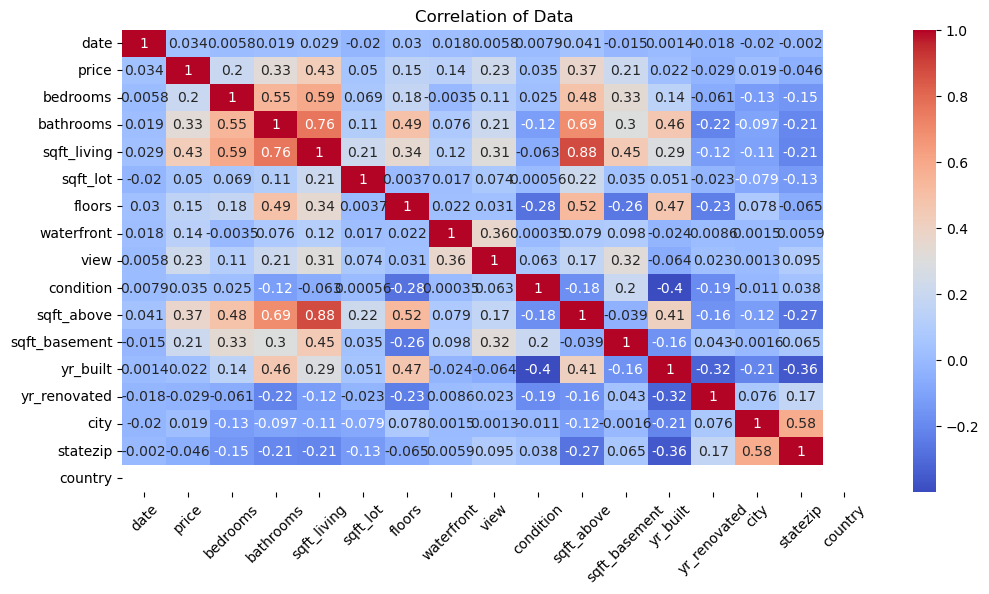

In [25]:
plt.figure(figsize=(12,6))
sns.heatmap(df.corr(),annot=True, cmap = 'coolwarm')
plt.title("Correlation of Data")
plt.xticks(rotation=45)
plt.show()

##### According to the Correlation Heatmap we observed that the Columns (country, city, statezip, yr_renovated and date) does not make any sense with price.

##### So i will remove these columns for preparation the data for machine learning.

In [27]:
df = df.drop(columns=['country','city','statezip','yr_renovated','date'])

##### Normalize the Price Column

<Axes: ylabel='price'>

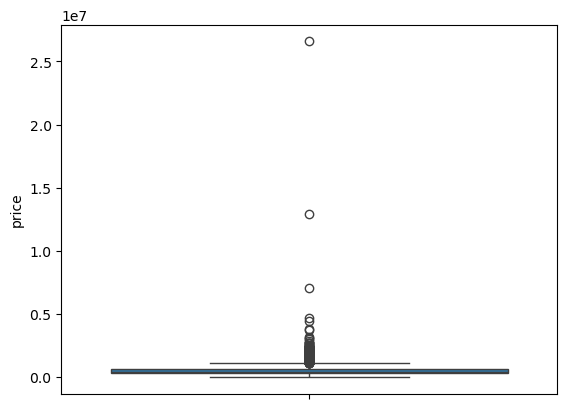

In [28]:
sns.boxplot(df['price'])

<Axes: xlabel='price', ylabel='Count'>

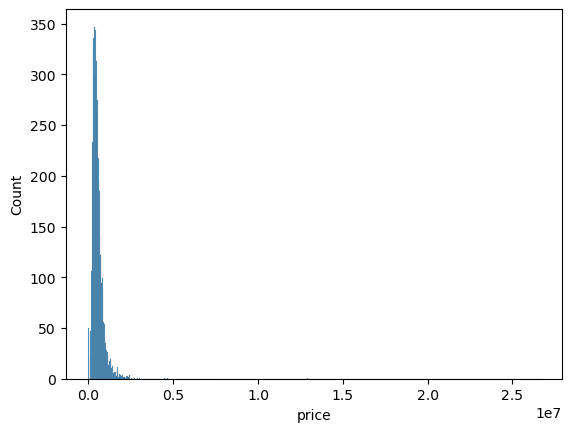

In [29]:
sns.histplot(df['price'])

#### There are outliers present in this column, which distort the distribution and do not represent the data accurately.

##### Removing the Outliers...

##### If you want exact numeric ranges, you’d need the actual values of:   1e6 1,000,000
Q1 (25th percentile)

Q2 (median)

Q3 (75th percentile)

IQR = Q3 - Q1

In [31]:
Q1 = df['price'].quantile(0.25)
Q3 = df['price'].quantile(0.75)
IQR = Q3 - Q1

# Define bounds
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filter out outliers
df=df[(df['price'] >= lower_bound) & (df['price'] <= upper_bound)]

##### Again Check the distribution of Data

<Axes: xlabel='price', ylabel='Count'>

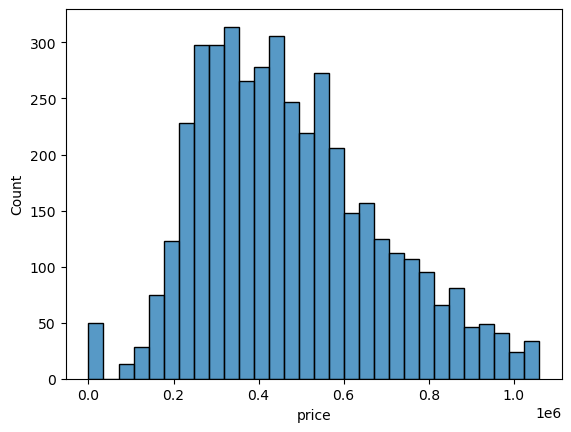

In [32]:
sns.histplot(df['price'])

##### Scatter plot showing the relationship between house price and square footage of the living area. This plot helps visualize how the size of a house impacts its price:

<Axes: xlabel='price', ylabel='sqft_living'>

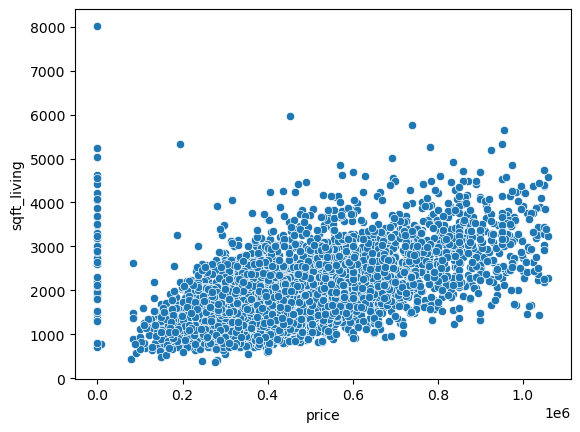

In [33]:
sns.scatterplot(df,x='price',y='sqft_living')

In [34]:

df[df['price']==0].head(10)

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
4354,0.0,3.0,1.75,1490,10125,1.0,0,0,4,1490,0,1962
4356,0.0,4.0,2.75,2600,5390,1.0,0,0,4,1300,1300,1960
4357,0.0,6.0,2.75,3200,9200,1.0,0,2,4,1600,1600,1953
4358,0.0,5.0,3.50,3480,36615,2.0,0,0,4,2490,990,1983
4361,0.0,5.0,1.50,1500,7112,1.0,0,0,5,760,740,1920
4362,0.0,4.0,4.00,3680,18804,2.0,0,0,3,3680,0,1990
4374,0.0,2.0,2.50,2200,188200,1.0,0,3,3,2200,0,2007
4376,0.0,4.0,2.25,2170,10500,1.0,0,2,4,1270,900,1960
4382,0.0,5.0,4.50,4630,6324,2.0,0,0,3,3210,1420,2006
4383,0.0,5.0,4.00,4430,9000,2.0,0,0,3,4430,0,2013


##### As we know, it is impossible for the price of a house to be zero. A price of zero is unrealistic and doesn't reflect the true market value, which is why we must account for such anomalies in the dataset, either by removing them to ensure model accuracy.

In [35]:
df = df[df['price'] != 0]

<Axes: xlabel='sqft_living', ylabel='Count'>

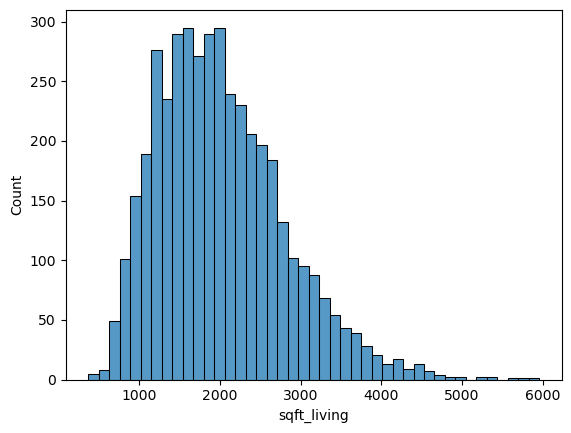

In [36]:
sns.histplot(df['sqft_living'])

##### Plot the Trend line Price vs Sqft Living:

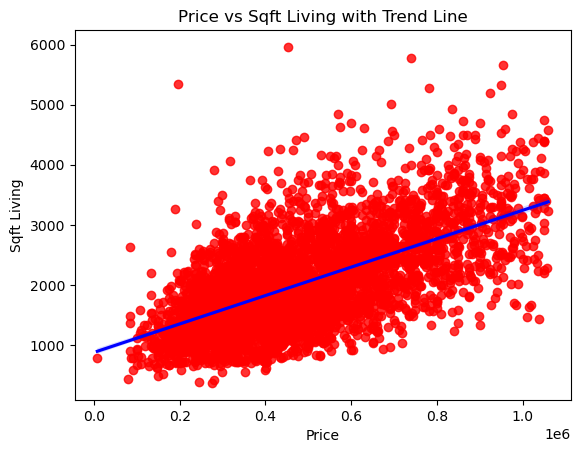

In [38]:
sns.regplot(data=df, x='price', y='sqft_living', scatter_kws={'color': 'red'}, line_kws={'color': 'blue'})
plt.title('Price vs Sqft Living with Trend Line')
plt.xlabel('Price')
plt.ylabel('Sqft Living')
plt.show()

In [39]:
df.shape

(4258, 12)

In [41]:
df.head()

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,sqft_above,sqft_basement,yr_built
0,313000.0,3.0,1.50,1340,7912,1.5,0,0,3,1340,0,1955
2,342000.0,3.0,2.00,1930,11947,1.0,0,0,4,1930,0,1966
3,420000.0,3.0,2.25,2000,8030,1.0,0,0,4,1000,1000,1963
4,550000.0,4.0,2.50,1940,10500,1.0,0,0,4,1140,800,1976
5,490000.0,2.0,1.00,880,6380,1.0,0,0,3,880,0,1938


##### The dataset has now been preprocessed and is ready for use in Machine Learning models.

### 🪓Split the Data 

In [50]:
X=df.drop(columns='price')
y=df['price']

In [51]:
from sklearn.model_selection import train_test_split

In [57]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=42)

### Check the 10 different Models to Select a Best Model:

In [58]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("LinearRegression")


# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.linear_model import Ridge
model=Ridge(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print('Ridge')
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.linear_model import Lasso
model=Lasso(alpha=0.1)
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("Lasso")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.linear_model import ElasticNet
model=ElasticNet()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("ElasticNet ")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.svm import SVR
model=SVR()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("SVR")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.tree import DecisionTreeRegressor
model=DecisionTreeRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("DecisionTreeRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.ensemble import RandomForestRegressor
model=RandomForestRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("RandomForestRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.neighbors import KNeighborsRegressor
model=KNeighborsRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("KNN")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from sklearn.ensemble import GradientBoostingRegressor
model=GradientBoostingRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
# Model Evaluation
print("GradientBoostingRegressor")
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")


from xgboost import XGBRegressor
model=XGBRegressor()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)
print("XGBRegressor")
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)
print("---------")

LinearRegression
MAE:  121303.224146678
MSE: 23098694759.443314
R2 Score:  0.4241300506580502
---------
Ridge
MAE:  121302.92533242902
MSE: 23098686812.307354
R2 Score:  0.4241302487868549
---------
Lasso
MAE:  121303.178469554
MSE: 23098700432.200985
R2 Score:  0.42412990923141525
---------
ElasticNet 
MAE:  123139.22008121987
MSE: 23382515814.424297
R2 Score:  0.4170541522899289
---------
SVR
MAE:  161112.41908824717
MSE: 41174472366.973045
R2 Score:  -0.02651433611661469
---------
DecisionTreeRegressor
MAE:  153294.6037015258
MSE: 39794899547.62784
R2 Score:  0.007879578252294128
---------
RandomForestRegressor
MAE:  114901.03971882643
MSE: 21642516519.69679
R2 Score:  0.46043380279161406
---------
KNN
MAE:  128640.54202644344
MSE: 26846929902.434383
R2 Score:  0.33068338605664294
---------
GradientBoostingRegressor
MAE:  116166.45629575156
MSE: 21598023858.845795
R2 Score:  0.4615430423662821
---------
XGBRegressor
MAE:  118693.35533504696
MSE: 23785202755.068146
R2 Score:  0.40701

##### According to the results of the 10 models above, Linear Regression showed the best and most reliable performance.

#### Build the Final Model

In [59]:
model=GradientBoostingRegressor()
model.fit(X_train,y_train)

GradientBoostingRegressor()

In [60]:
# Prediction of Model
y_pred=model.predict(X_test)

### Evaluation of the Model

In [61]:
# Model Evaluation
from sklearn.metrics import mean_absolute_error, mean_squared_error,r2_score
mae=mean_absolute_error(y_test,y_pred)
mse=mean_squared_error(y_test,y_pred)
r2=r2_score(y_test,y_pred)
print("MAE: ",mae)
print('MSE:',mse)
print("R2 Score: ",r2)

MAE:  116039.15096289056
MSE: 21568644580.03061
R2 Score:  0.46227549257523115


##### Summary:
###### The model predicts house prices with an MAE of $116,0399, MSE of 21.5B, and an R² score of 0.462, indicating it explains about 51.7% of the variance in prices. Performance is decent, but further improvement is possible.

### Comparison of Actual vs. Predicted House Prices:

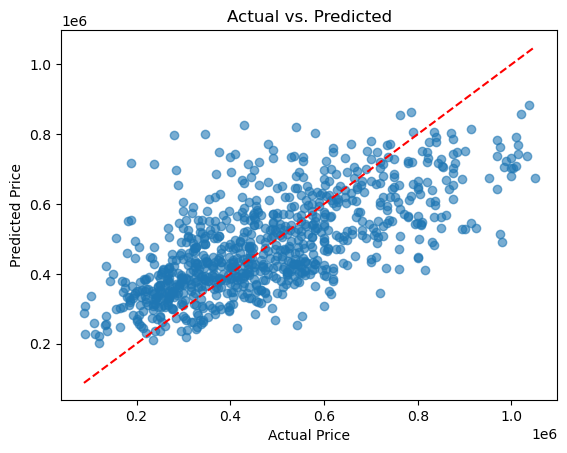

In [62]:

plt.scatter(y_test, y_pred, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')  # reference line
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual vs. Predicted')
plt.show()

##### Save the Model

In [63]:
import pickle
with open('house_price_prediction_model.pkl', 'wb') as file:
    pickle.dump(model, file)

In [64]:
import pickle
import pandas as pd

# Load the model
with open('house_price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Prepare input data (exclude 'price' since we're predicting it)
data = pd.DataFrame({
    'bedrooms': [3.0, 3.0],
    'bathrooms': [1.5, 2.0],
    'sqft_living': [1340, 1930],
    'sqft_lot': [7912, 11947],
    'floors': [1.5, 1.0],
    'waterfront': [0, 0],
    'view': [0, 0],
    'condition': [3, 4],
    'sqft_above': [1340, 1930],
    'sqft_basement': [0, 0],
    'yr_built': [1955, 1966]
})

# Make predictions
predictions = model.predict(data)

# Show results
for i, pred in enumerate(predictions):
    print(f"Predicted price for house {i+1}: ${pred:,.2f}")

Predicted price for house 1: $343,894.61
Predicted price for house 2: $423,033.50


In [65]:
import pickle
import pandas as pd

# Load the model
with open('house_price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# Single input row (features only, no 'price')
input_data = [[3.0, 1.5, 1340, 7912, 1.5, 0, 0, 3, 1340, 0, 1955]]
columns = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 
           'waterfront', 'view', 'condition', 'sqft_above', 'sqft_basement', 'yr_built']

# Create DataFrame
data = pd.DataFrame(input_data, columns=columns)

# Predict
prediction = model.predict(data)

# Show result
print(f"Predicted price: ${prediction[0]:,.2f}")

Predicted price: $343,894.61


In [66]:
import pickle

# Load the saved model
with open('house_price_prediction_model.pkl', 'rb') as file:
    model = pickle.load(file)

# One‑row input (double‑bracket 2‑D array) in the exact feature order the model expects
single_row = [[3.0, 1.5, 1340, 7912, 1.5, 0, 0, 3, 1340, 0, 1955]]

# Predict
predicted_price = model.predict(single_row)[0]

print(f"Predicted price: ${predicted_price:,.2f}")

Predicted price: $343,894.61


###### model.predict(single_row)  →  array([343,894.])
###### model.predict(single_row)[0]  →  343,894.0

### 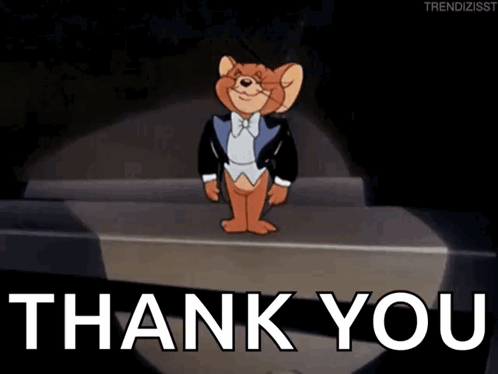